In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt #installs with osmnx
import pandas as pd
%matplotlib inline
ox.__version__

'1.5.1'

In [2]:
# get the network for Paris or city of your choice, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Paris, France"))
stats["circuity_avg"]

1.0396059851141934

The lower the circuity,  the more efficient the network

Boeing, G. 2019. “The Morphology and Circuity of Walkable and Drivable Street Networks.” In: The Mathematics of Urban Morphology (pp. 271-287), edited by L. D’Acci. Basel, Switzerland: Birkhäuser. doi:10.1007/978-3-030-12381-9_12

In [3]:
# get the street network for a place, and its area in square meters
place = "Paris, France"
gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type="drive")

In [5]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                            9624
m                                                                           18646
k_avg                                                                    3.874896
edge_length_total                                                     1809271.743
edge_length_avg                                                         97.032701
streets_per_node_avg                                                     3.160952
streets_per_node_counts         {0: 0, 1: 517, 2: 156, 3: 6433, 4: 2320, 5: 17...
streets_per_node_proportions    {0: 0.0, 1: 0.053719866999168746, 2: 0.0162094...
intersection_count                                                           9107
street_length_total                                                   1488363.929
street_segment_count                                                        15104
street_length_avg                                                       98.541044
circuity_avg    

In [6]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

value
n                           9624.000
m                          18646.000
k_avg                          3.875
edge_length_total        1809271.743
edge_length_avg               97.033
streets_per_node_avg           3.161
intersection_count          9107.000
street_length_total      1488363.929
street_segment_count       15104.000
street_length_avg             98.541
circuity_avg                   1.024
self_loop_proportion           0.001
node_density_km               91.385
intersection_density_km       86.476
edge_density_km            17180.075
street_density_km          14132.871
0way_int_count                 0.000
1way_int_count               517.000
2way_int_count               156.000
3way_int_count              6433.000
4way_int_count              2320.000
5way_int_count               176.000
6way_int_count                21.000
7way_int_count                 1.000
0way_int_prop                  0.000
1way_int_prop                  0.054
2way_int_prop                  0.016
3way_int_prop                  0.668
4way_int_prop                  0.241
5way_int_prop                  0.018
6way_int_prop                  0.002
7way_int_prop                  0.000

In [7]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(332476877, 0.11842334194950939)

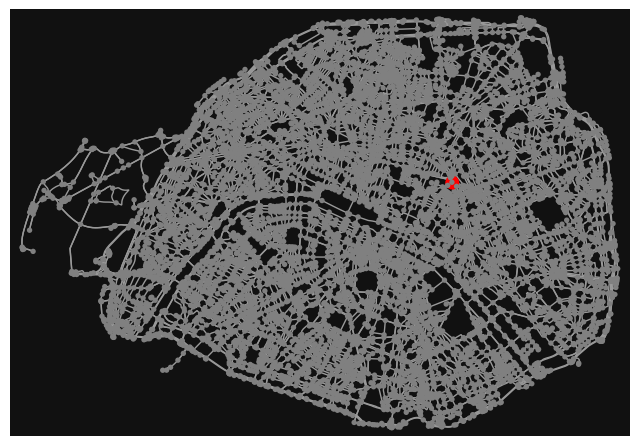

In [8]:
nc = ["r" if node == max_node else "grey" for node in G.nodes]
ns = [100 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=5)
plt.show()

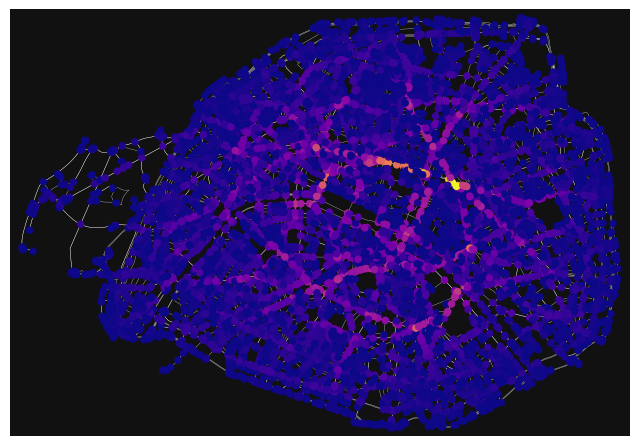

In [9]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

In [10]:
# get the network for Manhattan, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Manhattan,New York,United States"))
stats["circuity_avg"]

1.0296446724164448

In [11]:
# get the network for DC, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Washington DC, USA"))
stats["circuity_avg"]

1.0686289074999327

In [12]:
# get the street network for a place, and its area in square meters
place = "Washington DC, USA"
gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type="drive")

In [13]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                           10006
m                                                                           26907
k_avg                                                                    5.378173
edge_length_total                                                     3244322.245
edge_length_avg                                                        120.575398
streets_per_node_avg                                                     3.286528
streets_per_node_counts         {0: 0, 1: 574, 2: 77, 3: 5452, 4: 3733, 5: 152...
streets_per_node_proportions    {0: 0.0, 1: 0.05736558065160904, 2: 0.00769538...
intersection_count                                                           9432
street_length_total                                                   1955629.084
street_segment_count                                                        16340
street_length_avg                                                      119.683542
circuity_avg    

In [14]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

value
n                          10006.000
m                          26907.000
k_avg                          5.378
edge_length_total        3244322.245
edge_length_avg              120.575
streets_per_node_avg           3.287
intersection_count          9432.000
street_length_total      1955629.084
street_segment_count       16340.000
street_length_avg            119.684
circuity_avg                   1.035
self_loop_proportion           0.004
node_density_km               56.465
intersection_density_km       53.226
edge_density_km            18308.044
street_density_km          11035.816
0way_int_count                 0.000
1way_int_count               574.000
2way_int_count                77.000
3way_int_count              5452.000
4way_int_count              3733.000
5way_int_count               152.000
6way_int_count                17.000
7way_int_count                 1.000
0way_int_prop                  0.000
1way_int_prop                  0.057
2way_int_prop                  0.008
3way_int_prop                  0.545
4way_int_prop                  0.373
5way_int_prop                  0.015
6way_int_prop                  0.002
7way_int_prop                  0.000

In [15]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(49773070, 0.12351263892244202)

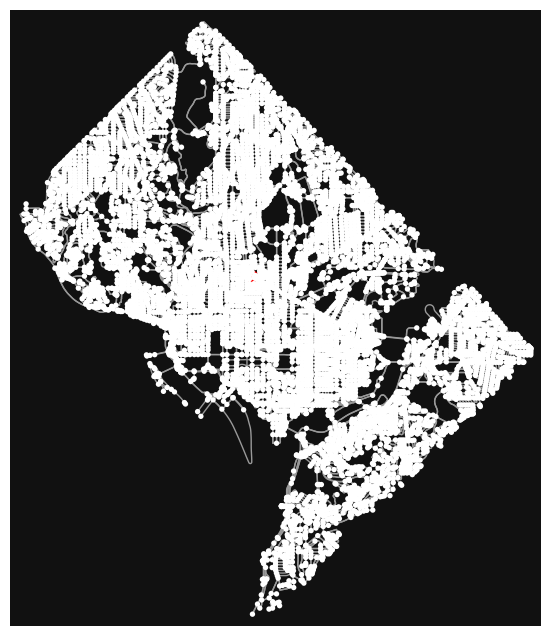

In [16]:
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

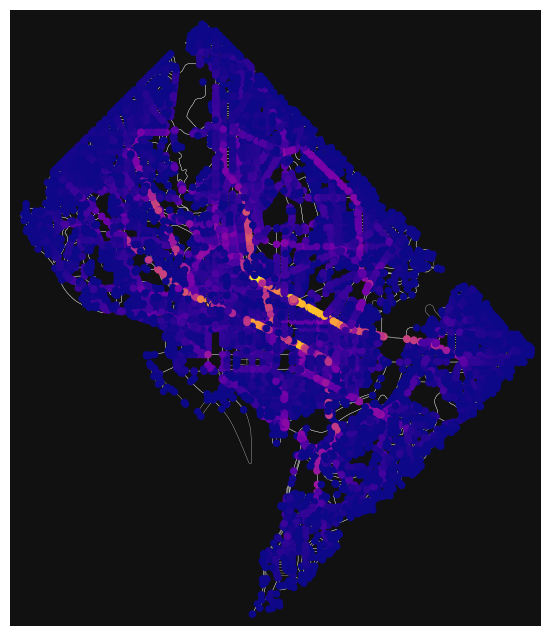

In [17]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

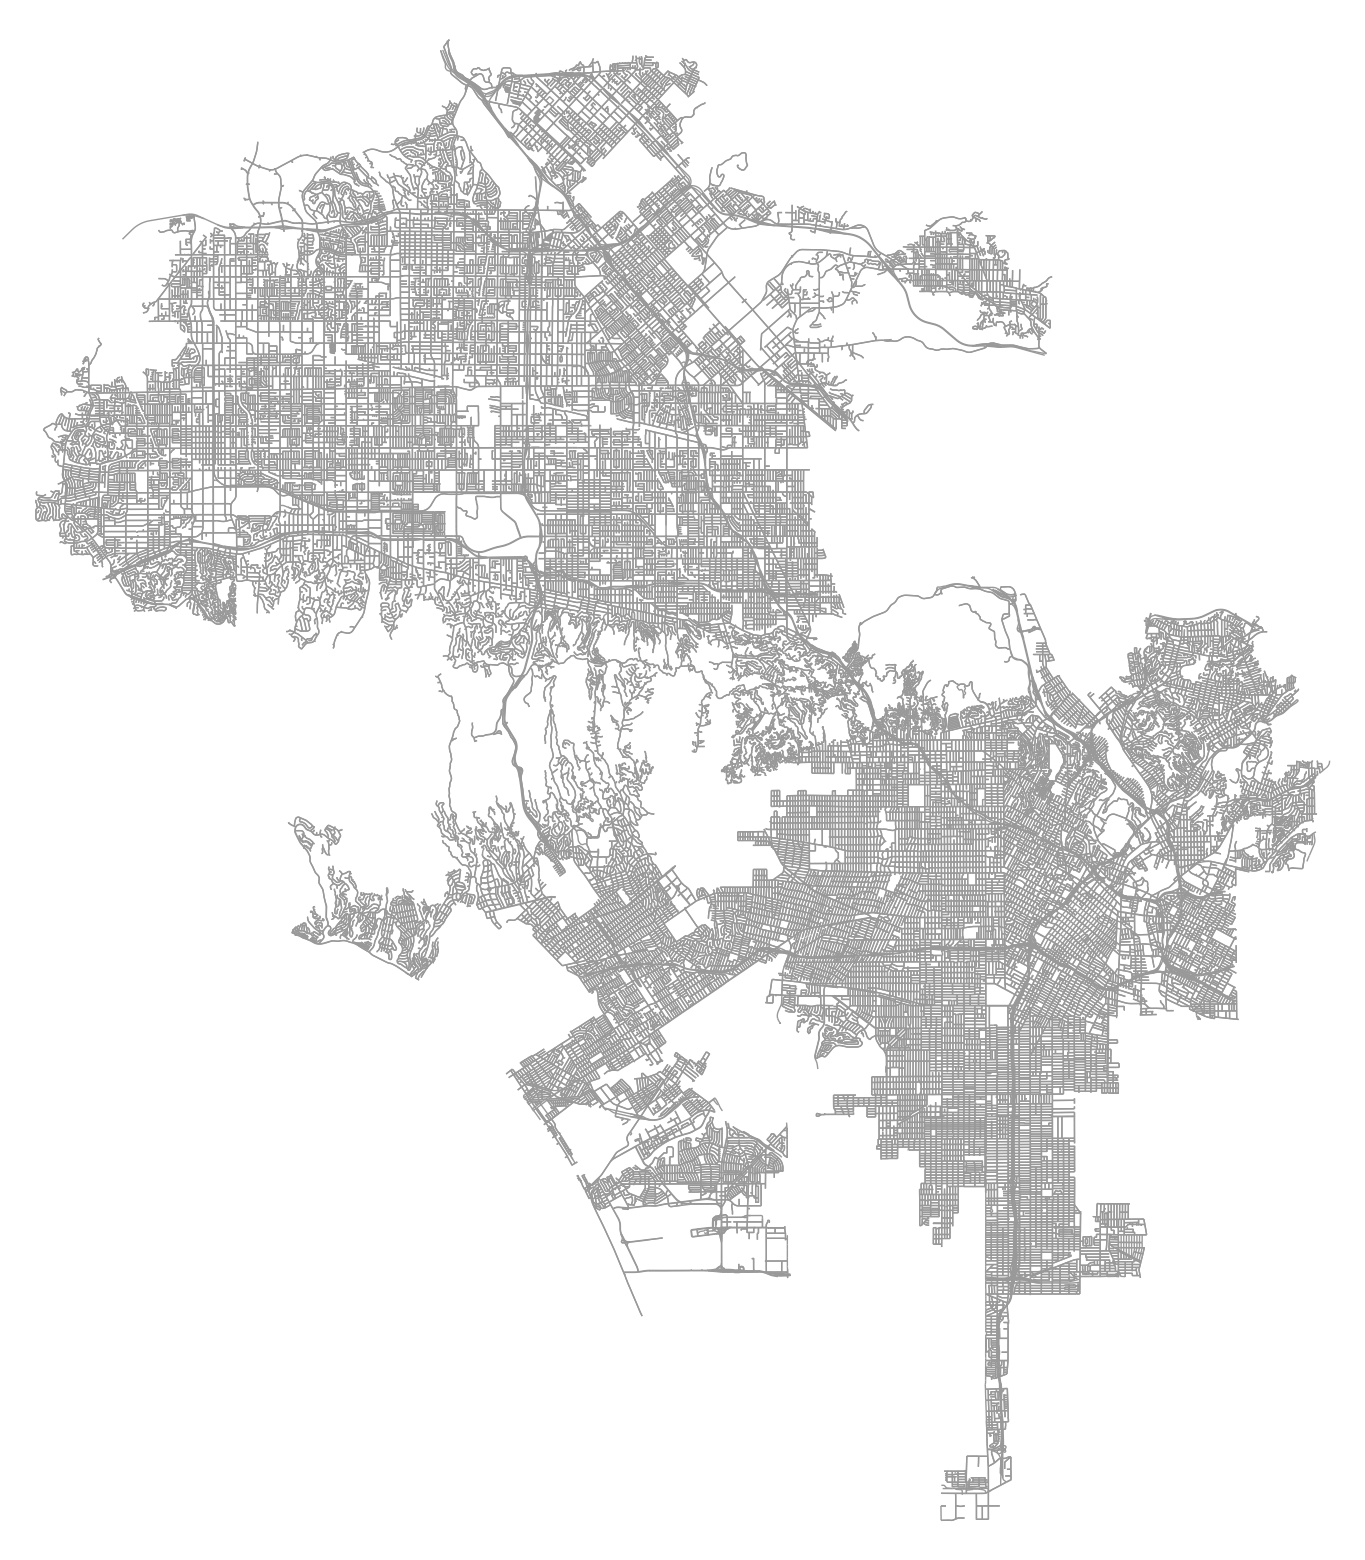

In [18]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Los Angeles,California,United States", network_type="drive")
fig, ax = ox.plot_graph(G,figsize=(20,20),bgcolor='#FFFFFF',
    node_color='black', node_size=0)


In [19]:
ox.speed.add_edge_speeds(G, hwy_speeds=None, fallback=None, precision=1)
ox.speed.add_edge_travel_times(G, precision=1)

/tmp/ipykernel_9895/2242964537.py:1: UserWarning: the `precision` parameter is deprecated and will be removed in a future release
  ox.speed.add_edge_speeds(G, hwy_speeds=None, fallback=None, precision=1)
/tmp/ipykernel_9895/2242964537.py:2: UserWarning: the `precision` parameter is deprecated and will be removed in a future release
  ox.speed.add_edge_travel_times(G, precision=1)


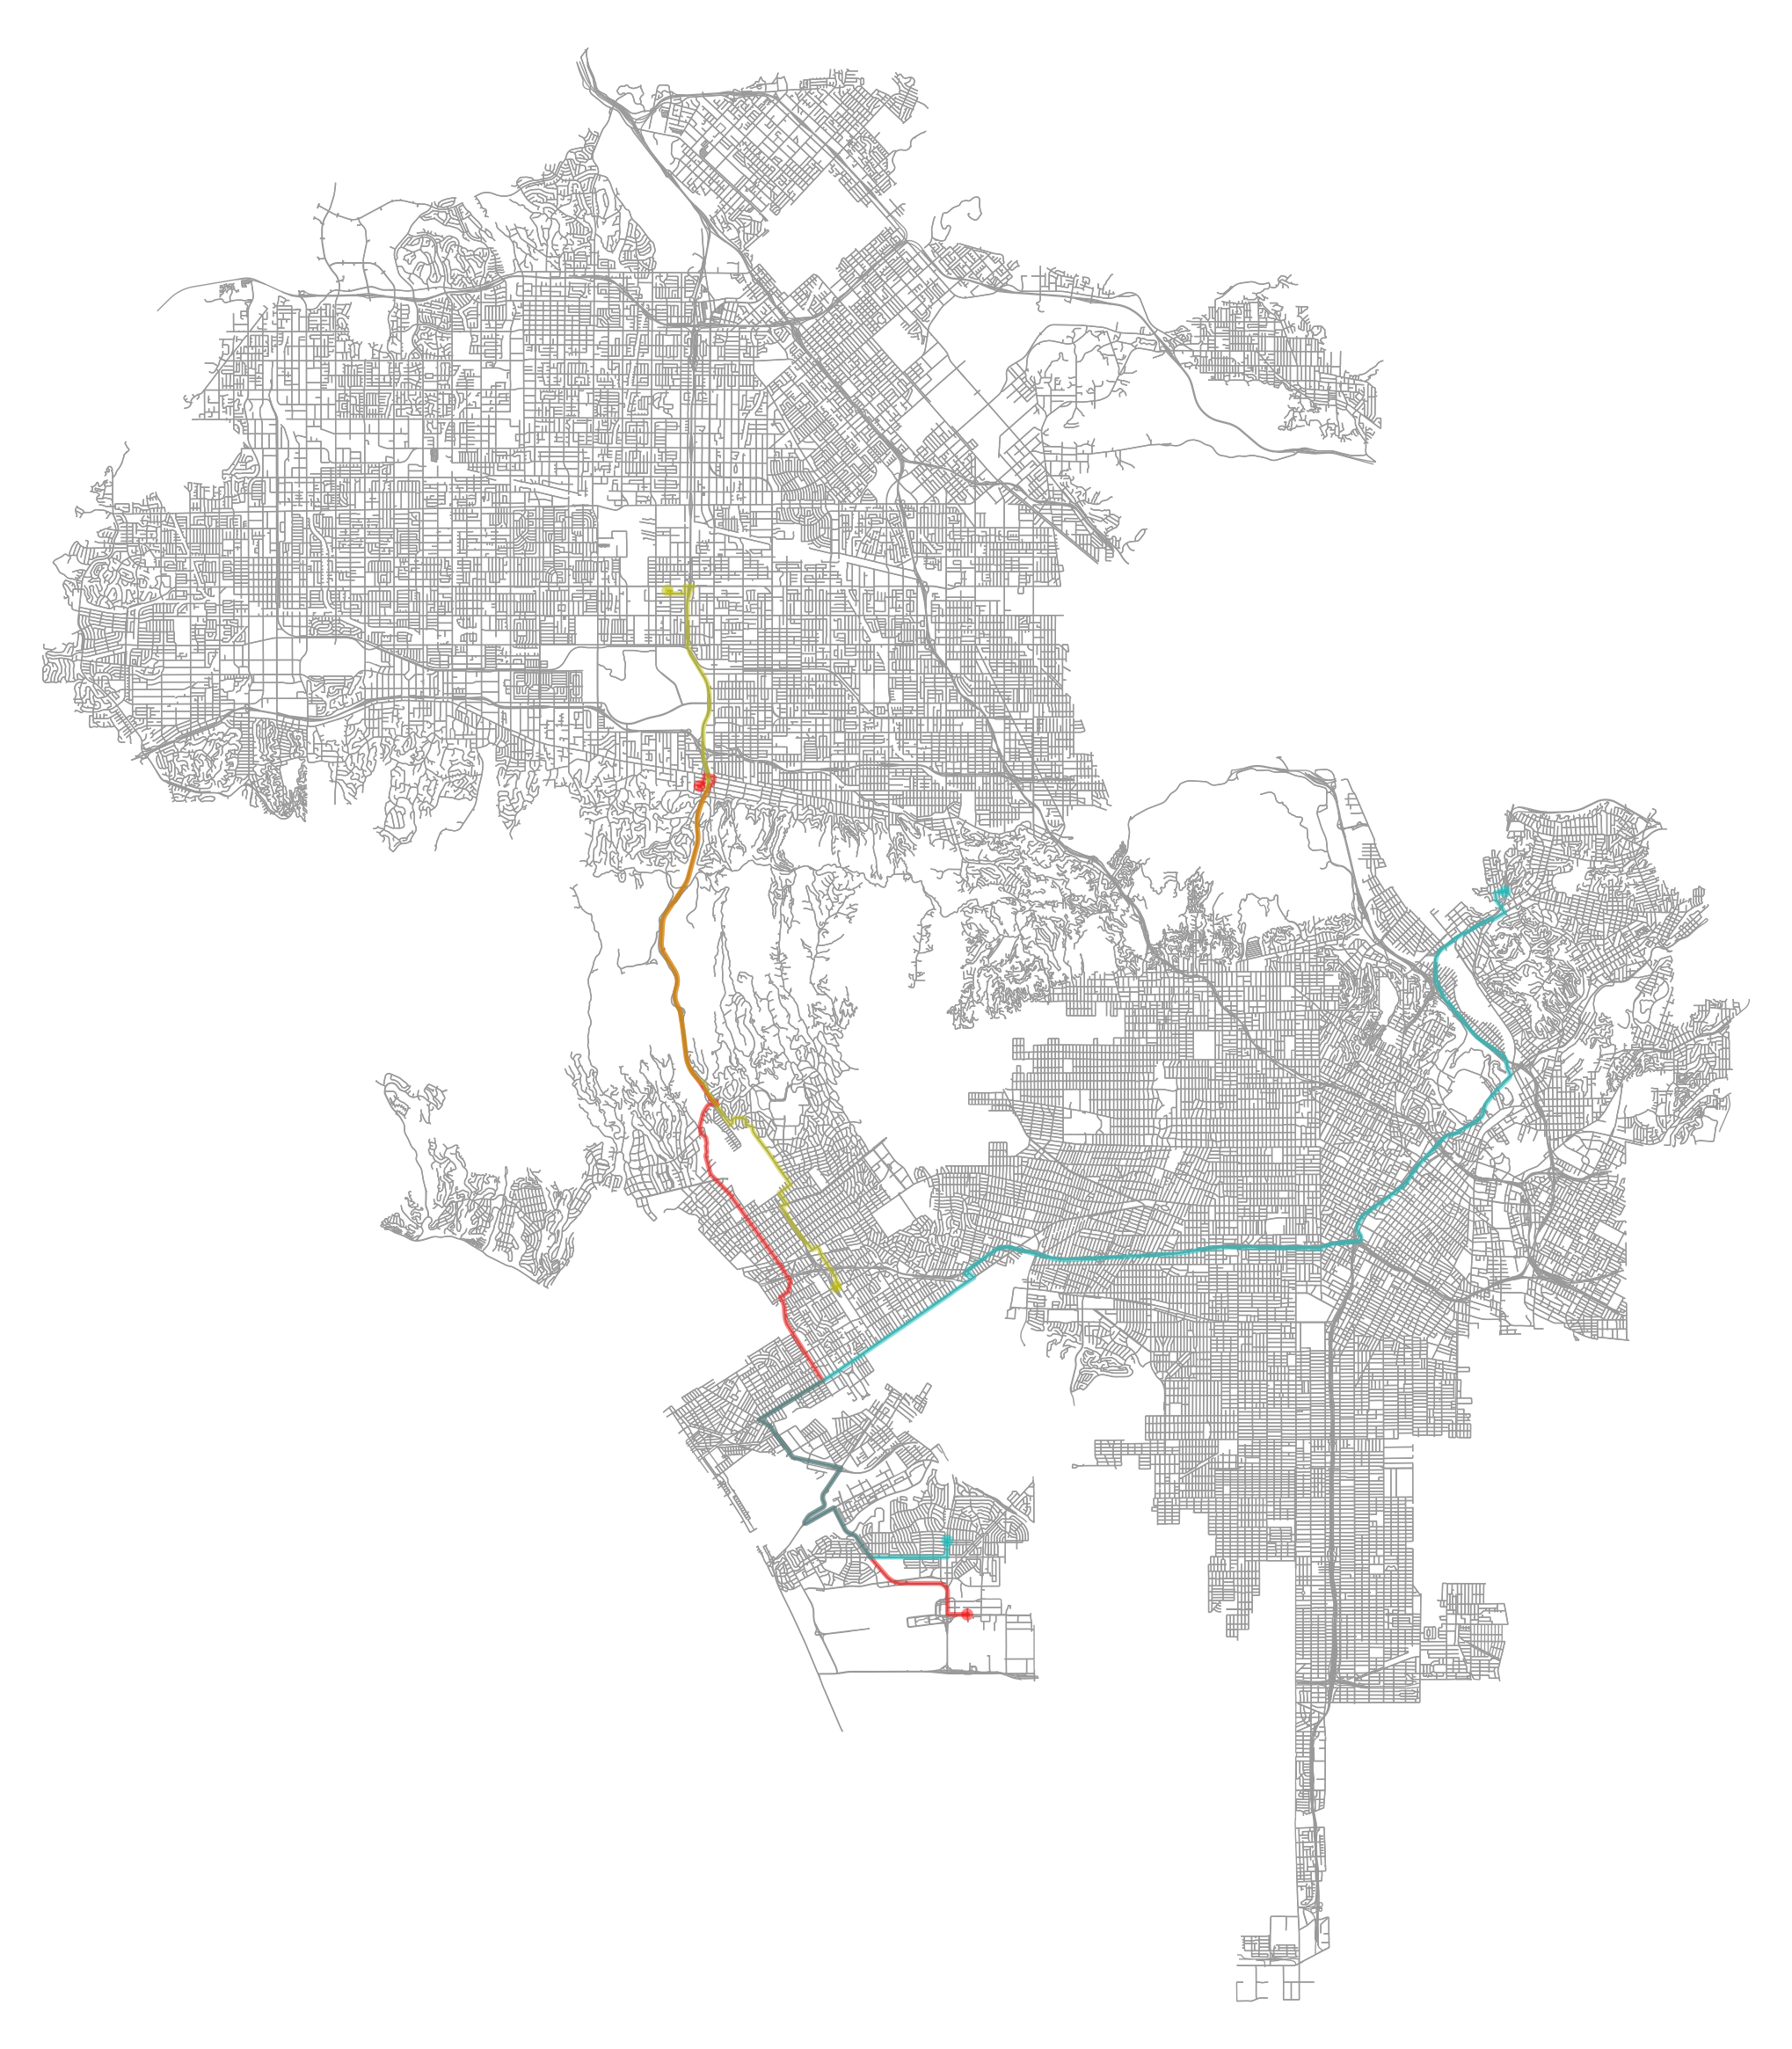

In [20]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

w = 'travel_time'
orig, dest = list(G)[10], list(G)[-10]
route1 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[0], list(G)[-1]
route2 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[-100], list(G)[100]
route3 = nx.shortest_path(G, orig, dest, weight=w)

routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, figsize=(30, 30),node_size=0,bgcolor='#FFFFFF')

/home/conda/global/80605782430cf99f23eea351a8dd0de7a271fc8a64fcd082745660d03d88eed4-20230710-195740-256256-47-answering-geospatial-questions/lib/python3.10/site-packages/osmnx/graph.py:362: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


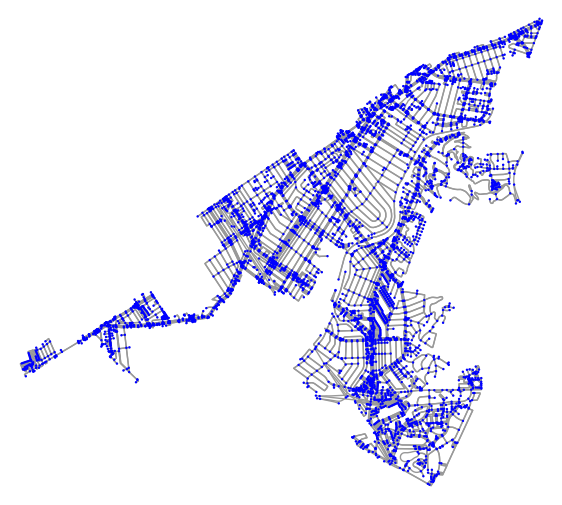

In [21]:
place_name = 'Culver City, California, United States'
G = ox.graph_from_place(place_name, clean_periphery=False,network_type="all_private")
fig, ax = ox.plot_graph(G,figsize=(7,7),bgcolor='#FFFFFF',
     node_color="b",node_size=3)

/home/conda/global/80605782430cf99f23eea351a8dd0de7a271fc8a64fcd082745660d03d88eed4-20230710-195740-256256-47-answering-geospatial-questions/lib/python3.10/site-packages/osmnx/graph.py:362: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


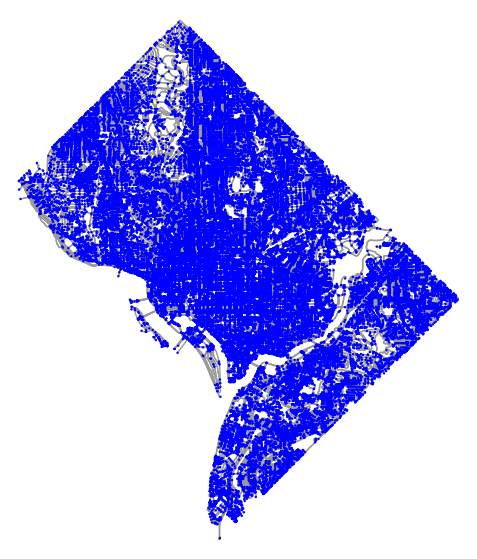

In [22]:
place_name = 'Washington DC, United States'
G = ox.graph_from_place(place_name, clean_periphery=False,network_type="all_private")
fig, ax = ox.plot_graph(G,figsize=(7,7),bgcolor='#FFFFFF',
     node_color="b",node_size=3)

In [23]:
place_name = "Culver City, California, United States"
graph = ox.graph_from_place(place_name, network_type='drive')

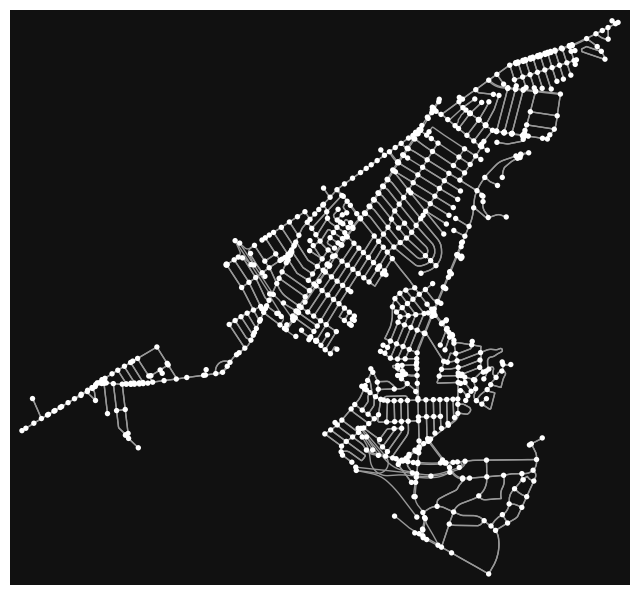

In [24]:
fig, ax = ox.plot_graph(graph)

In [25]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [26]:
# Check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'geometry', 'bridge', 'tunnel', 'junction',
       'access'],
      dtype='object')

In [27]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
edges.head()

osmid  oneway   lanes    ref  \
u        v         key                                                  
653681   26427612  0     [49287146, 149003055]    True  [6, 5]  I 405   
15857094 195016378 0                 398208017   False       6    NaN   
         122996319 0    [398208006, 398208014]   False       5    NaN   
15857097 123280827 0                 383946358   False     NaN    NaN   
         122734445 0                 165880112   False     NaN    NaN   

                                        name      highway maxspeed reversed  \
u        v         key                                                        
653681   26427612  0       San Diego Freeway     motorway   65 mph    False   
15857094 195016378 0    Washington Boulevard    secondary      NaN    False   
         122996319 0    Washington Boulevard    secondary      NaN     True   
15857097 123280827 0    Washington Boulevard    secondary   35 mph     True   
         122734445 0          Mildred Avenue  residential      NaN    False   

                         length  \
u        v         key            
653681   26427612  0    252.266   
15857094 195016378 0     20.118   
         122996319 0     86.509   
15857097 123280827 0     44.115   
         122734445 0    293.269   

                                                                 geometry  \
u        v         key                                                      
653681   26427612  0    LINESTRING (-118.40031 33.98940, -118.40087 33...   
15857094 195016378 0    LINESTRING (-118.43981 33.99445, -118.44000 33...   
         122996319 0    LINESTRING (-118.43981 33.99445, -118.43943 33...   
15857097 123280827 0    LINESTRING (-118.43226 33.99676, -118.43178 33...   
         122734445 0    LINESTRING (-118.43226 33.99676, -118.43224 33...   

                       bridge tunnel junction access  
u        v         key                                
653681   26427612  0      NaN    NaN      NaN    NaN  
15857094 195016378 0      NaN    NaN      NaN    NaN  
         122996319 0      NaN    NaN      NaN    NaN  
15857097 123280827 0      NaN    NaN      NaN    NaN  
         122734445 0      NaN    NaN      NaN    NaN

In [29]:
print(edges['highway'].value_counts())

highway
residential       1126
secondary          464
tertiary           246
primary            129
unclassified        60
motorway_link       17
secondary_link      16
primary_link        14
motorway            12
tertiary_link        2
Name: count, dtype: int64


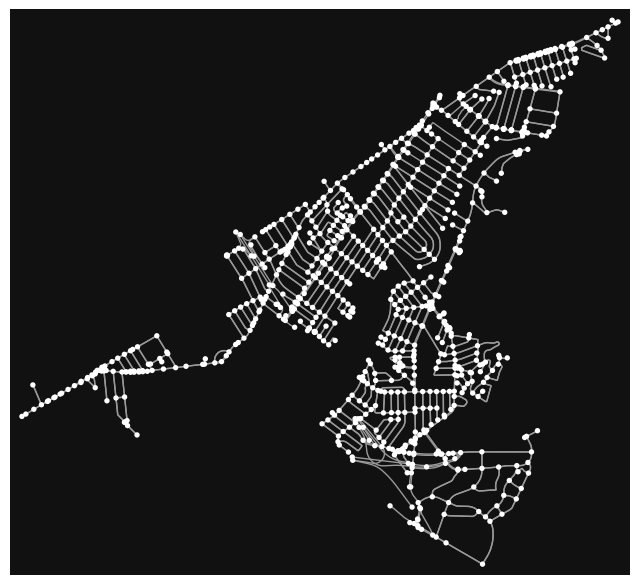

In [30]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [31]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [32]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [33]:
edges_proj.head()

osmid  oneway   lanes    ref  \
u         v         key                                                  
653681    26427612  0     [49287146, 149003055]    True  [6, 5]  I 405   
26427612  625976986 0                 759240583    True       6  I 405   
15857094  195016378 0                 398208017   False       6    NaN   
          122996319 0    [398208006, 398208014]   False       5    NaN   
195016378 15857094  0                 398208017   False       6    NaN   

                                         name    highway maxspeed reversed  \
u         v         key                                                      
653681    26427612  0       San Diego Freeway   motorway   65 mph    False   
26427612  625976986 0       San Diego Freeway   motorway   65 mph    False   
15857094  195016378 0    Washington Boulevard  secondary      NaN    False   
          122996319 0    Washington Boulevard  secondary      NaN     True   
195016378 15857094  0    Washington Boulevard  secondary      NaN     True   

                          length  \
u         v         key            
653681    26427612  0    252.266   
26427612  625976986 0    116.992   
15857094  195016378 0     20.118   
          122996319 0     86.509   
195016378 15857094  0     20.118   

                                                                  geometry  \
u         v         key                                                      
653681    26427612  0    LINESTRING (370663.103 3761864.529, 370612.585...   
26427612  625976986 0    LINESTRING (370529.299 3762077.999, 370467.586...   
15857094  195016378 0    LINESTRING (367022.606 3762474.458, 367005.323...   
          122996319 0    LINESTRING (367022.606 3762474.458, 367058.282...   
195016378 15857094  0    LINESTRING (367005.323 3762464.131, 367022.606...   

                        tunnel bridge junction access  
u         v         key                                
653681    26427612  0      NaN    NaN      NaN    NaN  
26427612  625976986 0      NaN    NaN      NaN    NaN  
15857094  195016378 0      NaN    NaN      NaN    NaN  
          122996319 0      NaN    NaN      NaN    NaN  
195016378 15857094  0      NaN    NaN      NaN    NaN

In [34]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32611

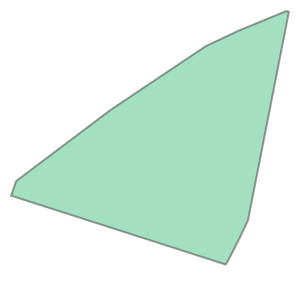

In [35]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull


In [36]:
# Calculate the area
area = convex_hull.area





In [37]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m



190279107.7872116

In [38]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)



{'n': 62681,
 'm': 177373,
 'k_avg': 5.6595459549145675,
 'edge_length_total': 8618237.41599987,
 'edge_length_avg': 48.588214756472915,
 'streets_per_node_avg': 3.0567157511845693,
 'streets_per_node_counts': {0: 0,
  1: 7848,
  2: 263,
  3: 35492,
  4: 18698,
  5: 334,
  6: 40,
  7: 2,
  8: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.12520540514669518,
  2: 0.004195848821812033,
  3: 0.566232191573204,
  4: 0.29830411129369344,
  5: 0.005328568465723265,
  6: 0.0006381519120626665,
  7: 3.1907595603133326e-05,
  8: 6.381519120626665e-05},
 'intersection_count': 54833,
 'street_length_total': 4720069.382000039,
 'street_segment_count': 95874,
 'street_length_avg': 49.23200640423931,
 'circuity_avg': 1.0680847021679862,
 'self_loop_proportion': 0.004255585455910883,
 'clean_intersection_count': 19290,
 'node_density_km': 329.4160915979064,
 'intersection_density_km': 288.1714163875497,
 'edge_density_km': 45292.60997816751,
 'street_density_km': 24806.03066143486,
 'clean_inte

In [39]:
place = "Culver City, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags={'building':True})
gdf.shape

/tmp/ipykernel_9895/4066471157.py:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags={'building':True})


(14662, 134)

In [40]:
# get all building footprints in some neighborhood
place = "Culver City, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

/tmp/ipykernel_9895/2868605817.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags)


(14662, 134)

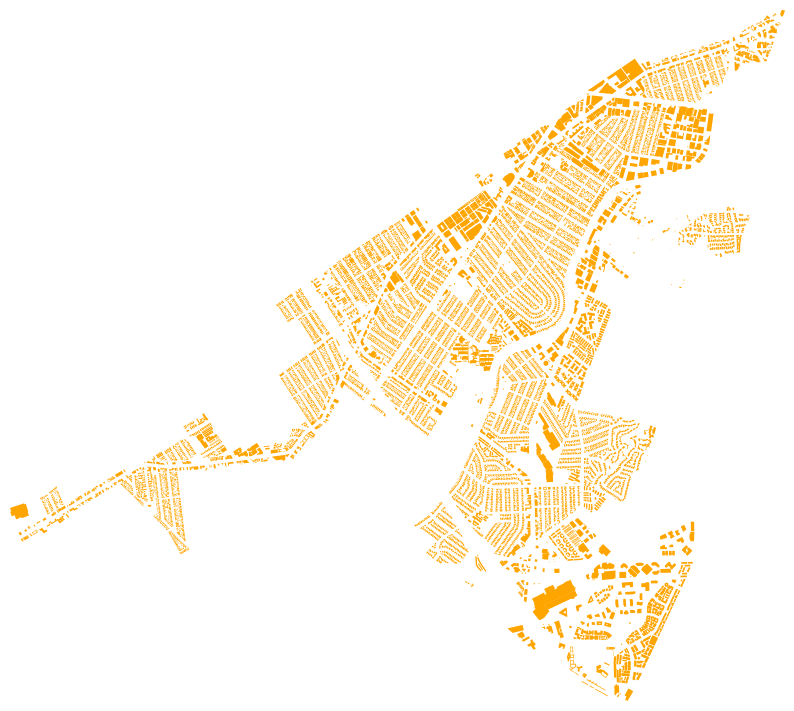

In [ ]:
fig, ax = ox.plot_footprints(gdf, figsize=(10, 10),bgcolor='#FFFFFF')

/tmp/ipykernel_9895/4288041072.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf=ox.geometries.geometries_from_address((52.3716,4.9005),dist=15000, tags={'natural':'water','highway':''})


<Axes: >

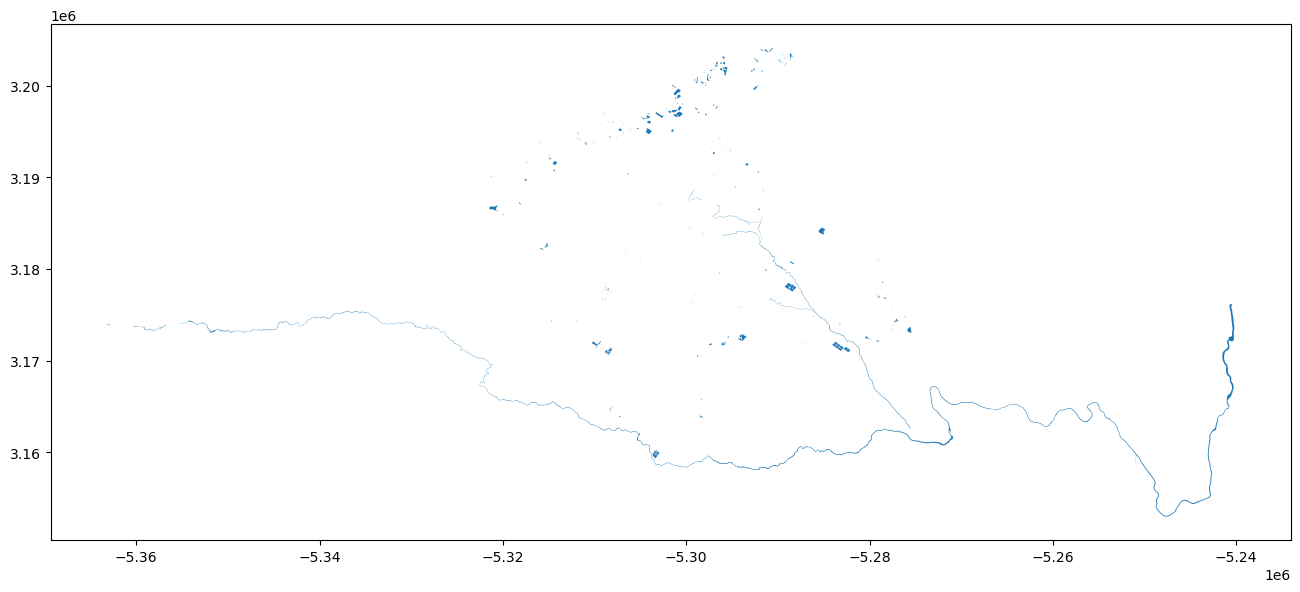

In [42]:
gdf=ox.geometries.geometries_from_address((52.3716,4.9005),dist=15000, tags={'natural':'water','highway':''})
gdf.to_crs(epsg=28992, inplace=True)
gdf.plot(figsize=(16,16))

/tmp/ipykernel_9895/2922751820.py:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place("Culver City, California, USA", tags)


<Axes: >

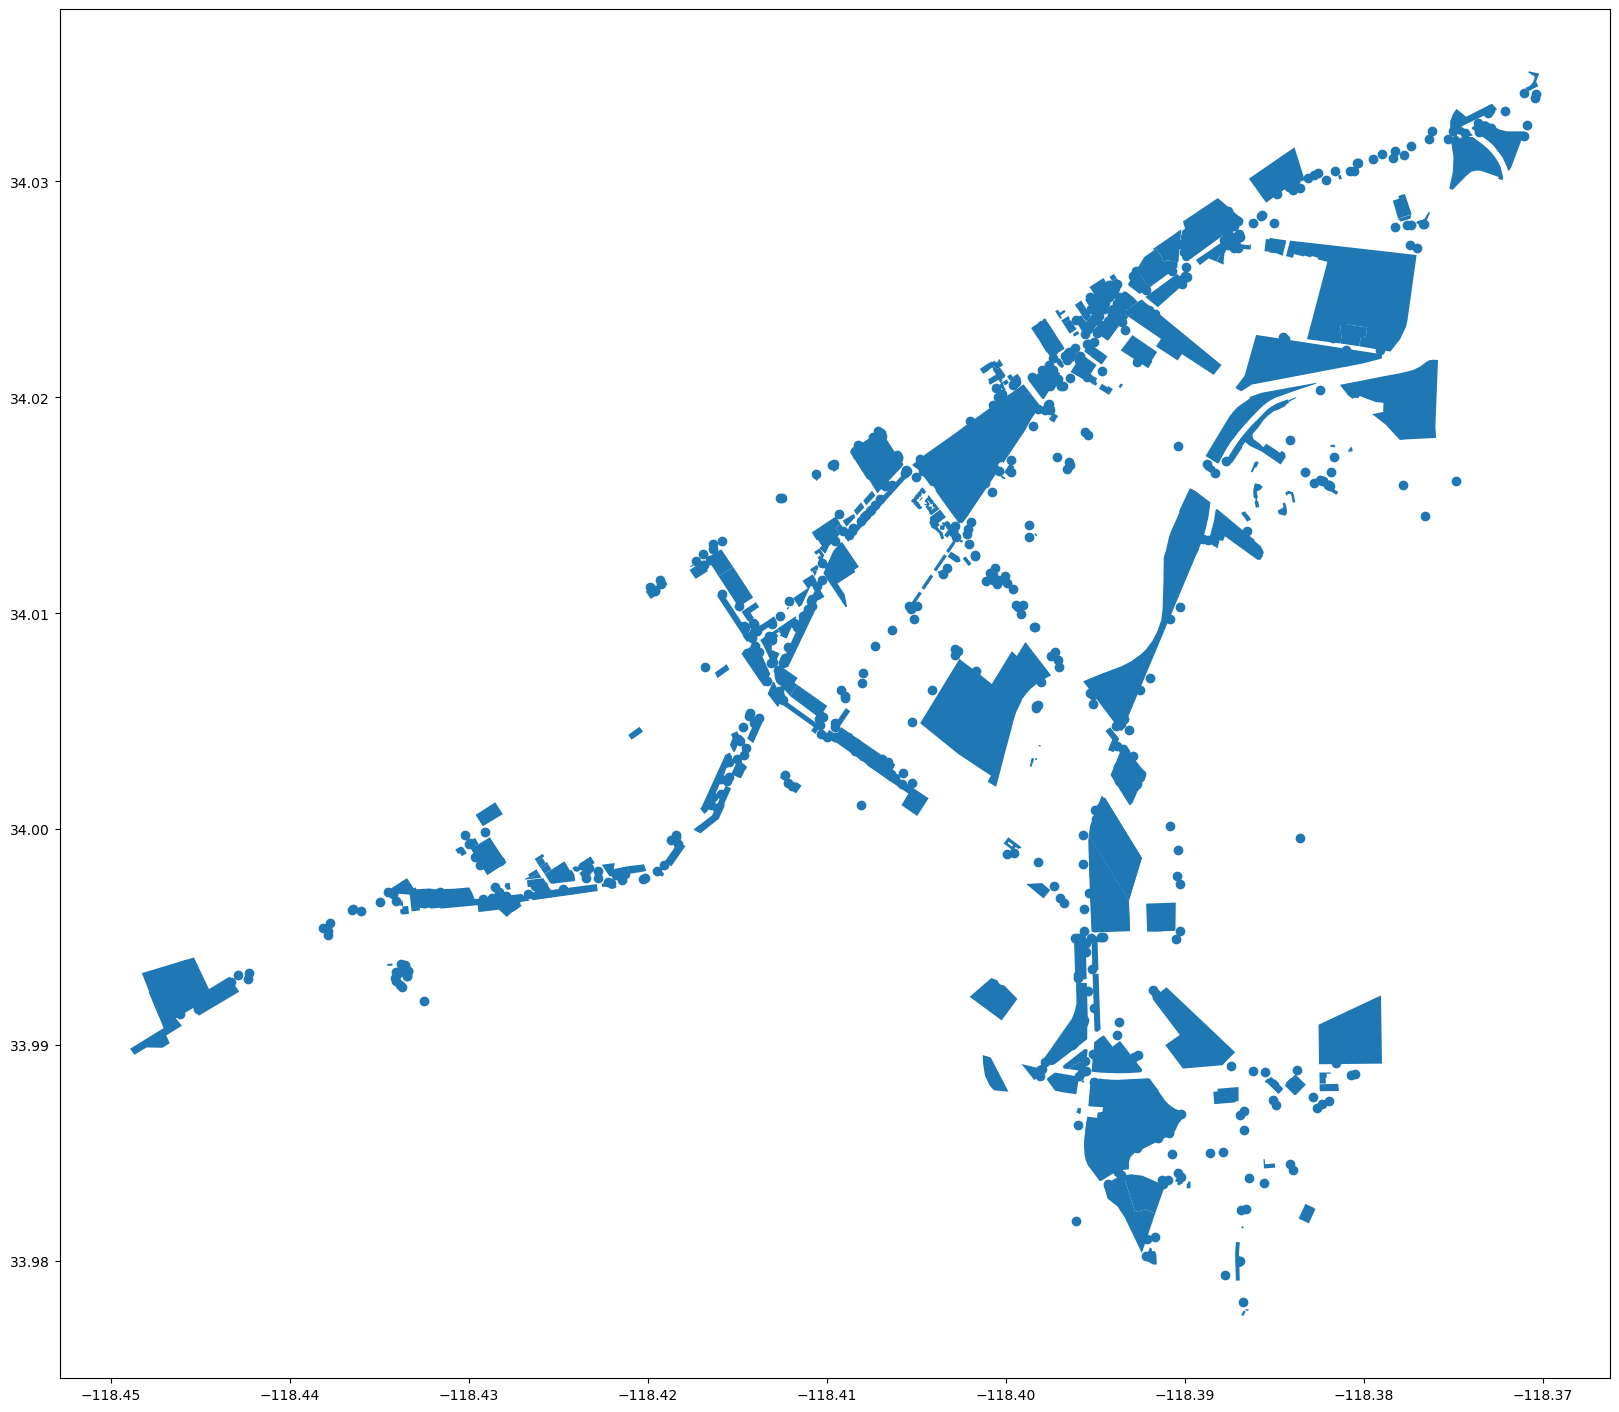

In [43]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Culver City, California, USA", tags)
gdf.shape
gdf.plot(figsize=(20,29))


In [44]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")



amenity  \
element_type osmid                
node         3181900796    bank   
             6109859997    bank   
             8336631380    bank   
             8347964371    bank   
             8462756038    bank   
             8547936014    bank   
             8868651740    bank   
             9027126479    bank   
             9176912213    bank   
             9988945423    bank   
way          391033607     bank   
             421669794     bank   
             421953289     bank   
             421953319     bank   
             422046032     bank   
             422269852     bank   

                                                                      name  \
element_type osmid                                                           
node         3181900796                                           Citibank   
             6109859997  Los Angeles Federal Credit Union - Culver City...   
             8336631380                                       OneWest Bank   
             8347964371                                              Chase   
             8462756038                                          U.S. Bank   
             8547936014                                             Wescom   
             8868651740                   First Entertainment Credit Union   
             9027126479                                         Union Bank   
             9176912213                                First Citizens Bank   
             9988945423                                   Bank of the West   
way          391033607                                               Chase   
             421669794                                     Bank of America   
             421953289                                               Chase   
             421953319                                         Wells Fargo   
             422046032                                     Bank of America   
             422269852                                     Bank of America   

                                                                  geometry  
element_type osmid                                                          
node         3181900796                        POINT (-118.39509 33.98827)  
             6109859997                        POINT (-118.40664 34.01672)  
             8336631380                        POINT (-118.39372 34.00289)  
             8347964371                        POINT (-118.39243 34.00256)  
             8462756038                        POINT (-118.39566 33.99530)  
             8547936014                        POINT (-118.39494 33.99814)  
             8868651740                        POINT (-118.41118 34.00998)  
             9027126479                        POINT (-118.42889 33.99885)  
             9176912213                        POINT (-118.39567 33.99103)  
             9988945423                        POINT (-118.38567 34.02843)  
way          391033607   POLYGON ((-118.39690 34.02249, -118.39672 34.0...  
             421669794   POLYGON ((-118.42736 33.99660, -118.42749 33.9...  
             421953289   POLYGON ((-118.39490 33.98897, -118.39490 33.9...  
             421953319   POLYGON ((-118.39009 33.98368, -118.39012 33.9...  
             422046032   POLYGON ((-118.39563 33.99261, -118.39562 33.9...  
             422269852   POLYGON ((-118.40816 34.01757, -118.40828 34.0...

In [45]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

geometry  bus public_transport  \
element_type osmid                                                           
node         3254606627  POINT (-118.38660 33.98239)  yes         platform   
             3254606628  POINT (-118.38689 33.98235)  yes         platform   
             3445774682  POINT (-118.38071 33.98862)  yes         platform   
             3881073410  POINT (-118.39478 33.98792)  yes         platform   
             3881073411  POINT (-118.39477 33.98807)  yes         platform   

                          highway                     network  
element_type osmid                                             
node         3254606627  bus_stop                 Metro Local  
             3254606628  bus_stop                 Metro Local  
             3445774682  bus_stop  Culver CityBus;Metro Local  
             3881073410  bus_stop              Culver CityBus  
             3881073411  bus_stop              Culver CityBus

In [46]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame

In [47]:
# plot the street network with folium
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")

/tmp/ipykernel_9895/3574262435.py:2: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")


In [49]:
# get all the building footprints in a city
gdf = ox.geometries_from_place("Culver City, California, USA", {"building": True})
gdf.shape

/tmp/ipykernel_9895/1591487832.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place("Culver City, California, USA", {"building": True})


(14662, 134)

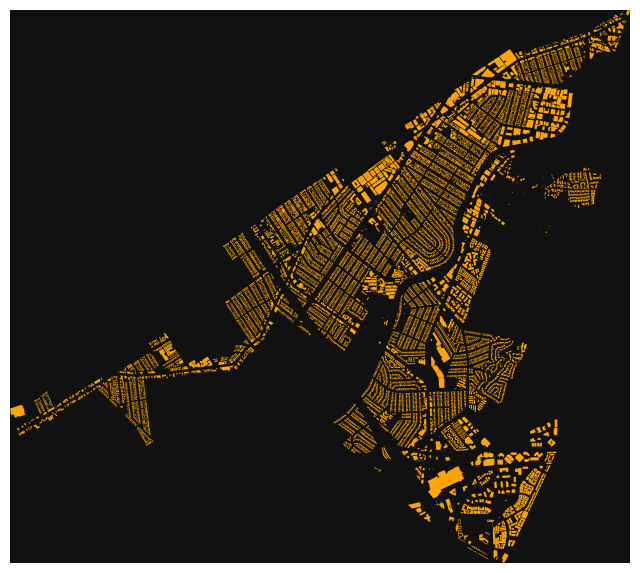

In [50]:
fig, ax = ox.plot_footprints(gdf)

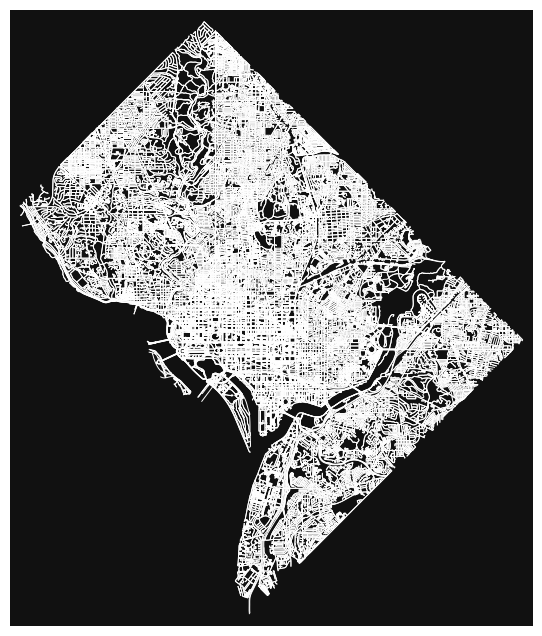

In [51]:
# or plot street network and the entities' footprints together
fig, ax = ox.plot_footprints(gdf, alpha=0.4, show=False)
fig, ax = ox.plot_graph(G, ax=ax, node_size=0, edge_color="w", edge_linewidth=0.7)

In [54]:
pip install descartes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import descartes
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline
ox.__version__

'1.5.1'

In [56]:
# configure the place, network type, trip times, and travel speed
place = {"city": "Culver City", "state": "California"}
network_type = "walk"
trip_times = [5, 10, 15, 20, 25]  # in minutes
travel_speed = 4.5  # walking speed in km/hour

In [57]:
# download the street network
G = ox.graph_from_place(place, network_type=network_type)

In [58]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])
G = ox.project_graph(G)

In [59]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [60]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

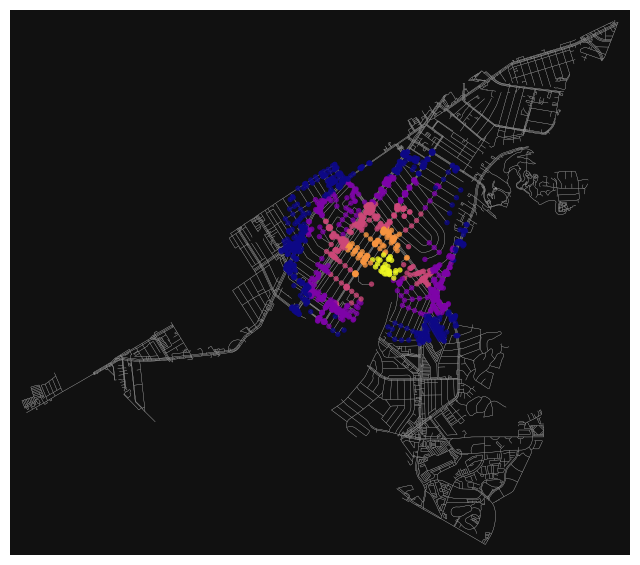

In [61]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

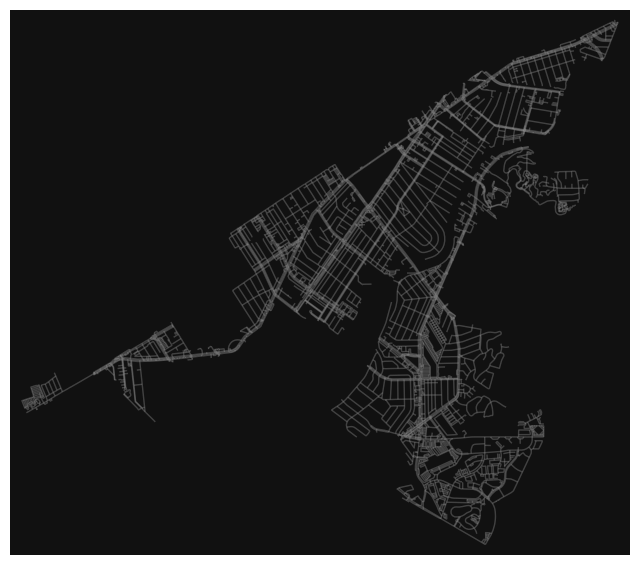

In [62]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")

        node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({"id": list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index("id")

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union

        # try to fill in surrounded areas so shapes will appear solid and
        # blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys


isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.7, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [63]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

In [ ]:
# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon

In [ ]:
# get the place boundaries
place = "Seattle, Washington"
gdf = ox.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(place, network_type="drive", retain_all=True)

In [ ]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="white",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry.geoms:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [ ]:
islands = ox.geometries_from_place(place, tags={"place": ["island", "islet"]})
islands.shape

In [ ]:
plt.show()

In [ ]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

Rerunning new section

In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd


In [ ]:
place_name = "Paris, France"
graph = ox.graph_from_place(place_name, network_type='drive')


Default face color is:  (0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 1.0)

In [ ]:

fig, ax = ox.plot_graph(graph)




In [ ]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [ ]:
# Check columns
edges.columns

In [ ]:
# Check crs
edges.crs

In [ ]:
edges.head()

In [ ]:
print(edges['highway'].value_counts())

In [ ]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [ ]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:
print("Coordinate system:", edges_proj.crs)

In [ ]:
edges_proj.head()

In [ ]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

In [ ]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj)
stats

In [ ]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [ ]:
graph_proj = ox.project_graph(graph)


nodes_proj = ox.graph_to_gdfs(graph_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m


In [ ]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.basic_stats(graph_proj)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

In [ ]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

In [ ]:
nodes_proj.head()

In [ ]:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float)

In [ ]:
# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)

In [ ]:
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

In [ ]:
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph_from_place("Madrid", network_type="drive", custom_filter=cf)
fig, ax = ox.plot_graph(G, node_size=3,node_color='black',edge_linewidth=3,bgcolor='#FFFFFF')


In [ ]:
place = "Madrid, Spain"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
fig, ax = ox.plot_footprints(gdf, figsize=(20, 20),alpha=1,color='black',bgcolor='#FFFFFF',save=True,filepath='settings.imgs_folder/image.png',show=True,dpi=600)

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
place_name = 'Madrid,Spain'
G = ox.graph_from_place(place_name,network_type="drive")
fig, ax = ox.plot_graph(G,figsize=(20,20),bgcolor='#FFFFFF',
    node_color='black', node_size=0)

In [ ]:
G = ox.graph_from_place(
    "Madrid, Spain",network_type="all",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    
)

fig, ax = ox.plot_graph(G, figsize=(20, 20),node_size=0, edge_color="#111111", edge_linewidth=0.7,bgcolor='#FFFFFF')